<h1><center> Supervised Learning </center></h1>

<font color='green'>**Supervised learning**</font>: Uses **labeled** data

	Predictor variables/features and a target variable. 
	Data usually given in a table form.
	Aim: Predict the target variable, given the predictor variables.
    
Naming conventions: <br>

    Features = predictor variable = independent variable 
    Target variable = dependent variable = response variable

In [21]:
# all imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [3]:
iris_bunch = datasets.load_iris()
iris_bunch.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

<h1><center> kNN k-Nearest-Neighbors </center></h1>

The Sklearn Classifier requires:
* Data as numpy array or pandas df
* Feature data has **continous** values
* <font color='red'>**CANNOT**</font> contain **missing** data!
* Feature and target data have same number of observations

![title](img/knn_princ.png)

## Training / fitting

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# classifier object
knn = KNeighborsClassifier(n_neighbors=6) 

# training/fitting the data
knn.fit(X=iris_bunch['data'], y=iris_bunch['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

## Predicting

In [5]:
# unlabeled sample data
X_new = np.reshape(np.array([4.0, 3.3, 1.5, 0.25]), (1, 4)) 

# Predict and print the label for the new data point X_new
prediction = knn.predict(X_new)
print("From {} predicted: {}".format(X_new, iris_bunch.target_names[prediction]))

From [[4.   3.3  1.5  0.25]] predicted: ['setosa']


## Model Performance Measure

In classification, <font color='green'>**accuracy**</font> is a commonly used metric. <br> 

$$\text{Accuracy}  = \frac{\text{corret predictions}}{\text{total datapoints}}$$

1. Use fraction of labeled data for **TRAINING** the model
2. Make predicitons on the **TEST** set
3. Compare **TEST** predicitons with **REAL** labels

In [6]:
from sklearn.model_selection import train_test_split

X = iris_bunch['data']
y = iris_bunch['target']

# startified argument distributes target labels evenly in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                   random_state = 7, 
                                                   stratify=y)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Predictions vs Real labels: ')
print(y_pred)
print(y_test)

# measure the accuracy
print("Accuracy: {}".format(round(knn.score(X_test, y_test), 3)))

Predictions vs Real labels: 
[1 1 2 0 1 0 2 2 2 0 0 2 0 1 1 1 2 1 2 2 0 1 2 1 1 0 0 2 0 2 1 1 1 0 0 2 1
 0 1 0 2 2 2 0 0]
[1 1 2 0 1 0 2 2 2 0 0 2 0 1 1 1 2 1 2 2 0 1 1 1 1 0 0 2 0 2 1 1 1 0 0 2 2
 0 1 0 2 2 2 0 0]
Accuracy: 0.956


## Model Complexity and Decision Boundries (DB)

$$ \text{Larger k} = \text{smoother DB} = \text{less complex} $$

$$ \text{Smaller k} = \text{more complex} = \text{can lead to overfitting} $$

![title](img/decision_boundry.png)

## Model Complexity Curve
### Overfitting & Underfitting

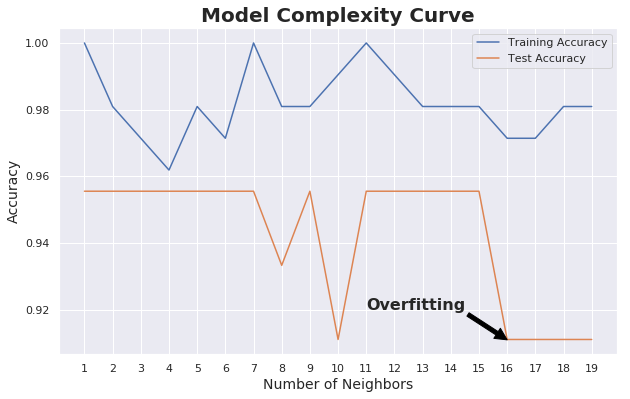

In [7]:
sns.set()

X = iris_bunch['data']
y = iris_bunch[]'target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                   random_state=7, stratify=y)

k_values = np.arange(1, 20)
train_accuracy = np.empty(len(k_values))
test_accuracy = np.empty(len(k_values))

for i, k in enumerate(k_values):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.figure(figsize=(10, 6))
plt.title("Model Complexity Curve", fontsize=20, weight='bold')
plt.plot(k_values, train_accuracy, label="Training Accuracy")
plt.plot(k_values, test_accuracy, label="Test Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(k_values)
plt.annotate("Overfitting", xy=(16, 0.911), xytext=(11, 0.92), 
             arrowprops={'color' : 'black'}, weight='bold', fontsize=16)
plt.show()

### Plotting Decision Boundries

In [11]:
# construct df
iris_df = pd.DataFrame(iris_bunch.data, columns=iris_bunch.feature_names)
iris_df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


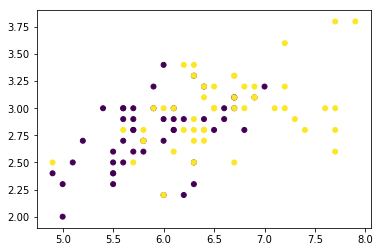

In [27]:
# extract only sepal length and width for viriginica and versicolor.
# Thus skipping 50 first datapoints which correspond to setosa.
vir_ver_df = iris_df.iloc[50:, :2]
y_vir_ver = iris_bunch.target[50:]

_ = plt.scatter(vir_ver_df.iloc[:,0], vir_ver_df.iloc[:, 1], c=y_vir_ver,
           marker='.', s=100, cmap='viridis')

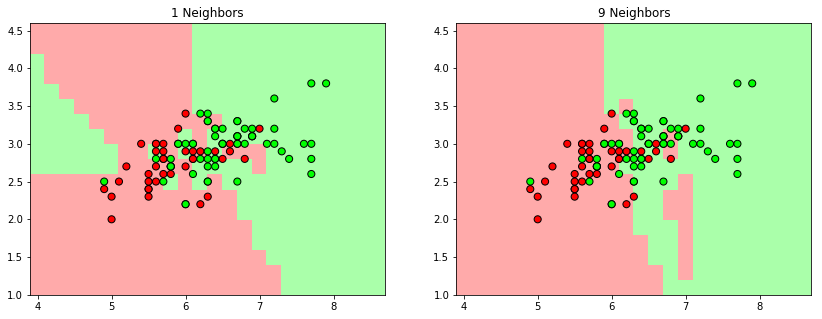

In [25]:
#Plot decision boundrie for 2-features
X = vir_ver_df.values
y = y_vir_ver

h = 0.2 # step size in mesh

n_neighbs = [1, 9]
position = [1, 2]

plt.figure(figsize=(14,5))

for k, pos in zip(n_neighbs, position):
    
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # reduce min and increase max by 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))
    
    # feed classifier to meshgrid
    Z = clf.predict(np.c_[x1.ravel(), x2.ravel()]) # "c_" slice objects to concatenation along 2nd axis.
    Z = Z.reshape(x1.shape)                        # 'ravel()'' returns a contiguous flattened array.
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Put the result into a color plot
    plt.subplot(1, 2, pos)
    plt.pcolormesh(x1, x2, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=50)
    plt.xlim(x1.min(), x1.max())
    plt.ylim(x2.min(), x2.max())
    plt.title("%i Neighbors" % k)

### Feature engineering

* Products (interactions) of features can be added to the dataset

## Summary:

 * Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.
 * in general a larger $k$ suppresses the effects of noise, but makes the classification boundaries less distinct.
 * The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point.